># Python Programming Assignment 

Start Date : 11-Nov-2023

* Marks Weight = 
** Total Marks = 100 
* Due Date = 
> ## Data Cleaning and Basic Plotting

BA Program

* **Student Name** : Mahender Reddy Thota
* **Student ID** : 8871144

## Q1) 

Download the file "BA Program Assignment 3 - Data Cleaning.xlsx”  .  Use appropriate data cleaning techniques and methods in Pandas to convert the raw file into  clean data structure ” as shown in the reference file "Your Assignment3 output file should look like this.xlsx" and answer the questions below. 

Your answers should be accurate.  All cleaning and manipulation should be done in Python only. Be careful for subtotals in the data to avoid double counting. **(50 marks)**



### Paste your cleaning code to convert the raw file to the clean file below , 

In [1]:
#Importing pandas
import pandas as pd
#Reading the excel file and skipping the first 4 blank rows
stats = pd.read_excel(r'C:\Users\SHASHI\OneDrive\Course Work\Data Analytics\BA Program Assignment 3 - Data Cleaning.xlsx',
                     skiprows=4)
stats.head()
#Reading column names
stats.columns
#Stripping leading and trailing blank spaces in column names
stats.columns = stats.columns.str.strip()
#Checking null values by each column
stats.isnull().sum()/stats.shape[0]
#Dropping columns with all null values
stats = stats.dropna(how= 'all', axis ='columns')
#Dropping rows with all null values
stats = stats.dropna(how= 'all', axis ='rows')
#Replacing blank spaces with None
stats = stats.replace(' ',None)
#Dropping rows where no. of wickets and no. of runs are missing
stats = stats.dropna(subset = ['Number of Wickets Taken','Number of Runs'])
#Dropping the last row based on index since it has the total values
stats.drop(index=stats.index[-1],axis=0,inplace=True)
#Filling the null values using fowrward fill method
stats = stats.fillna(method='ffill')
#Exporting the cleaned data to excel
stats.to_excel('Cleaned_Stats_File_Assignment_3.xlsx')


#### Write the full code that lead to the answer of each of the following questions in the single cell below each question.

## Q2) What is the grand total number of wickets taken by all the players ? 
**10 marks**

In [2]:
stats['Number of Wickets Taken'].sum()

268.0

## Q3) What is the total number of runs made in *each* match (M1 till M8) ? 
**10 marks**

In [3]:
stats.groupby('Match Number')['Number of Runs'].sum()

Match Number
M1    3623.0
M2     259.0
M3    2309.0
M4      19.0
M5    1124.0
M6      83.0
M7      68.0
M8      31.0
Name: Number of Runs, dtype: float64

## Q4) Show the average number of runs made in each Match (M1 till M8)  using a bar graph. 
**10 marks**

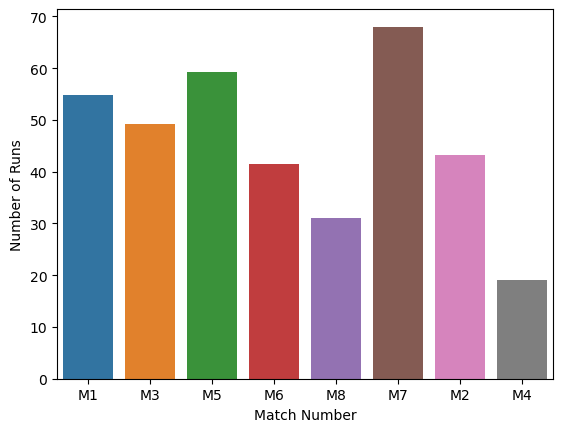

In [4]:
#Bar graph using Seaborn, deafult estimator is average for barplot
import seaborn as sns
fig = sns.barplot(stats,x='Match Number',y='Number of Runs', errorbar=None)

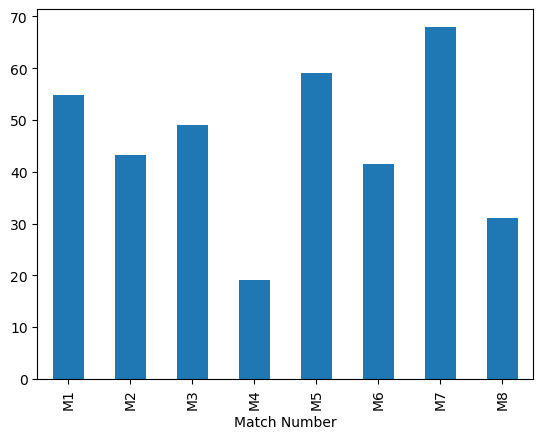

In [5]:
#Using pandas plot function; first preparing the dataframe then plotting
df = stats.groupby('Match Number')['Number of Runs'].mean()
fig1 = df.plot(x='Match Number',y='Number of Runs',kind='bar')

## Q5) Import the tips dataset from seaborn package and complete the parts below , 
5a) Find out the correlation between total bill, tip and size column using appropriate data frame method. 

5b) Show the result of question 4 in a form of a seaborn package heatmap. 

**20 marks**

In [9]:
#5a
import seaborn as sns
tips = sns.load_dataset('tips')
#Finding correlation coefficient using corr() method
corr_coef = tips[['total_bill','tip','size']].corr()
corr_coef

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


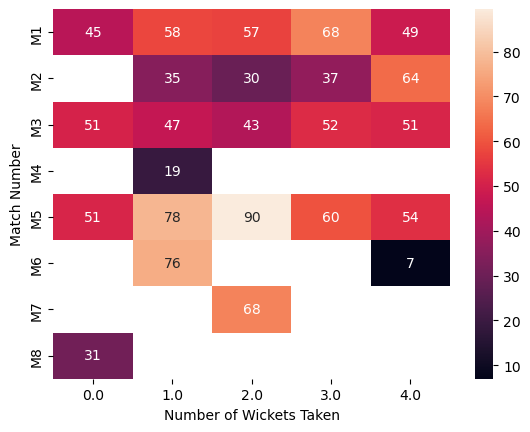

In [7]:
#5b
df1 = stats.pivot_table(index="Match Number",columns="Number of Wickets Taken", values="Number of Runs")
fig2 = sns.heatmap(df1, annot=True)